Решение не найдено для игрока 2, возвращаем приблизительное значение.
Матрица выплат:
 [[-4  9  4  0]
 [-3 -4  8  0]
 [ 0 -7 -3 -8]
 [-9  1 -5 -9]]

Оптимальные вероятности стратегий для игрока 1: [0.19594595 0.51351351 0.29054054 0.        ]
Оптимальные вероятности стратегий для игрока 2: [0. 0. 0. 0.]
Значение игры: -2.3243243243243246


<ipython-input-3-f321650a15a3>:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")


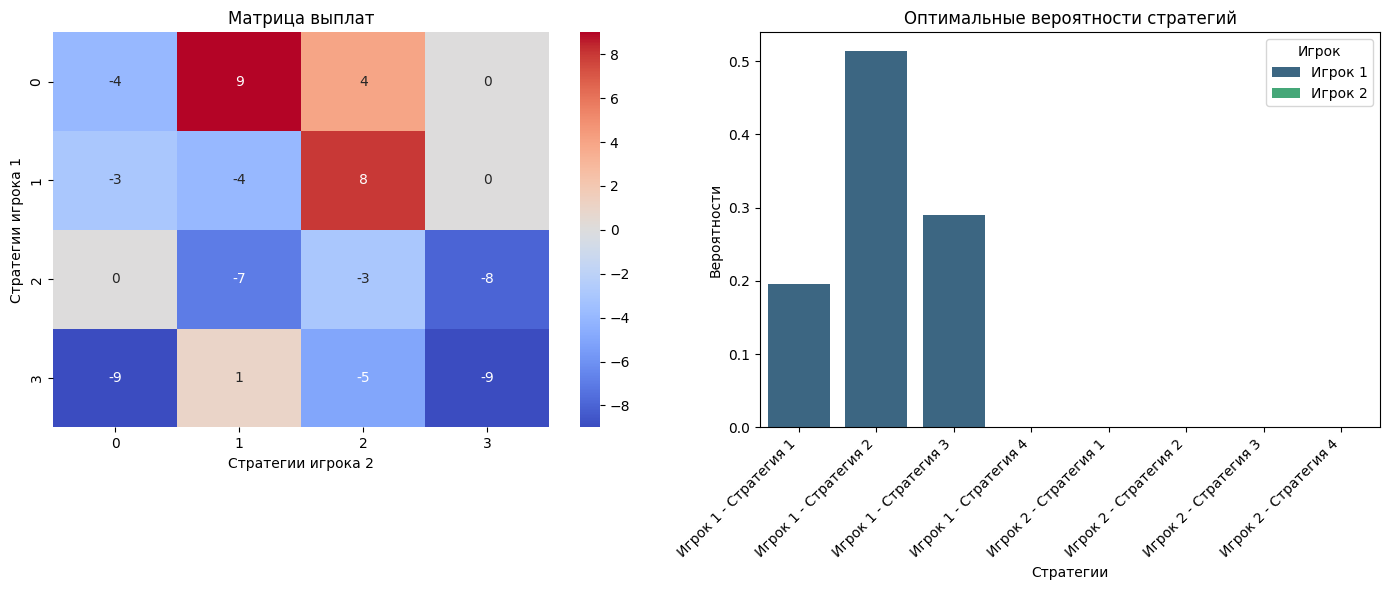

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Генерируем случайную матрицу выплат (например, для 4 стратегий у каждого игрока)
np.random.seed(42)
payoff_matrix = np.random.randint(-10, 10, (4, 4))

def solve_zero_sum_game(payoff_matrix):
    n_rows, n_cols = payoff_matrix.shape

    # Решение для игрока 1 (максимизируем минимальное значение выигрыша)
    c = np.zeros(n_rows + 1)
    c[-1] = -1  # минимизируем V

    A_ub = np.hstack([-payoff_matrix.T, np.ones((n_cols, 1))])
    b_ub = np.zeros(n_cols)

    A_eq = np.ones((1, n_rows + 1))
    A_eq[0, -1] = 0
    b_eq = [1]

    bounds = [(0, 1) for _ in range(n_rows)] + [(None, None)]

    result_1 = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")
    if not result_1.success:
        raise ValueError("Решение не найдено для игрока 1")

    # Оптимальные стратегии и значение игры для игрока 1
    probabilities_1 = result_1.x[:-1]
    game_value = result_1.x[-1]

    # Решение для игрока 2 (минимизируем максимальное значение выигрыша для игрока 1)
    c = np.zeros(n_cols + 1)
    c[-1] = 1  # максимизируем V

    A_ub = np.hstack([payoff_matrix, np.ones((n_rows, 1))])
    b_ub = np.zeros(n_rows)

    A_eq = np.ones((1, n_cols + 1))
    A_eq[0, -1] = 0
    b_eq = [1]

    bounds = [(0, 1) for _ in range(n_cols)] + [(None, None)]

    result_2 = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")
    if not result_2.success:
        print("Решение не найдено для игрока 2, возвращаем приблизительное значение.")
        probabilities_2 = np.zeros(n_cols)
    else:
        # Оптимальные стратегии для игрока 2
        probabilities_2 = result_2.x[:-1]

    return probabilities_1, probabilities_2, game_value

# Запуск и вывод
probabilities_1, probabilities_2, game_value = solve_zero_sum_game(payoff_matrix)

print("Матрица выплат:\n", payoff_matrix)
print("\nОптимальные вероятности стратегий для игрока 1:", probabilities_1)
print("Оптимальные вероятности стратегий для игрока 2:", probabilities_2)
print("Значение игры:", game_value)

# Визуализация с помощью Seaborn
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Визуализация матрицы выплат
sns.heatmap(payoff_matrix, annot=True, fmt="d", cmap="coolwarm", ax=ax[0])
ax[0].set_title("Матрица выплат")
ax[0].set_xlabel("Стратегии игрока 2")
ax[0].set_ylabel("Стратегии игрока 1")

# Визуализация стратегий игроков
strategies_df = {
    "Стратегии": [f"Игрок 1 - Стратегия {i+1}" for i in range(len(probabilities_1))] +
                 [f"Игрок 2 - Стратегия {j+1}" for j in range(len(probabilities_2))],
    "Вероятности": np.concatenate([probabilities_1, probabilities_2]),
    "Игрок": ["Игрок 1"] * len(probabilities_1) + ["Игрок 2"] * len(probabilities_2)
}

sns.barplot(x="Стратегии", y="Вероятности", hue="Игрок", data=strategies_df, palette="viridis", ax=ax[1])
ax[1].set_title("Оптимальные вероятности стратегий")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()
